/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


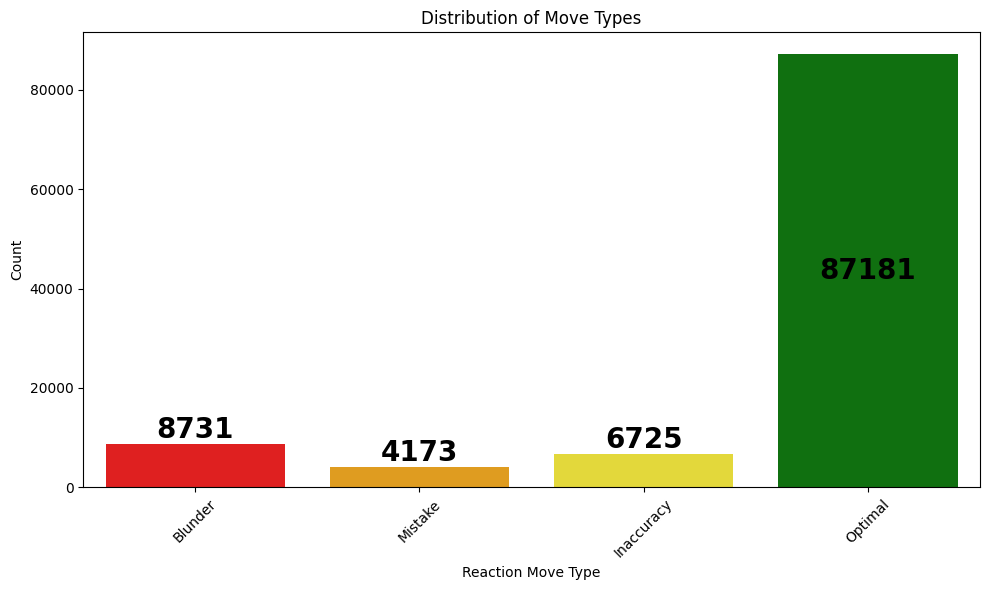

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/kaggle/input/chess-fen-cp-data/final_data.csv')

# Drop rows with NaN values in the specified columns
df = df.dropna(subset=[
    'constellation_cp_change', 'const_11_nodes_searched', 
    'cp_sd_diff', 
    'idf', 'reaction_move_type','white_elo','black_elo'
])

# Remove rows where 'const_11_cp' is not between -3000 and 3000 and 'constellation_cp_change' is not between -3000 and 3000
df = df[(df['const_11_cp'] >= -3000) & (df['const_11_cp'] <= 3000) & 
        (df['constellation_cp_change'] >= -3000) & (df['constellation_cp_change'] <= 3000)]

# Ensure the 'reaction_move_type' column is a categorical type with the specified order
df['reaction_move_type'] = pd.Categorical(df['reaction_move_type'], 
                                             categories=['Blunder', 'Mistake', 'Inaccuracy', 'Optimal'], 
                                             ordered=True)

# Calculate the counts for each category
counts = df['reaction_move_type'].value_counts().loc[['Blunder', 'Mistake', 'Inaccuracy', 'Optimal']]

# Plot the distribution of the categorical variable 'reaction_move_type'
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette=['Red', 'Orange', '#FFF01F', 'Green'])

# Add counts on top of each bar and inside the last bar
for index, value in enumerate(counts.values):
    if index == len(counts) - 1:  # Last bar (Optimal)
        plt.text(index, value / 2, str(value), ha='center', va='center', fontsize=20, color='black', fontweight='bold')
    else:
        plt.text(index, value, str(value), ha='center', va='bottom', fontsize=20, fontweight='bold')

plt.title('Distribution of Move Types')
plt.xlabel('Reaction Move Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_18/2986962350.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_18/2986962350.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fon

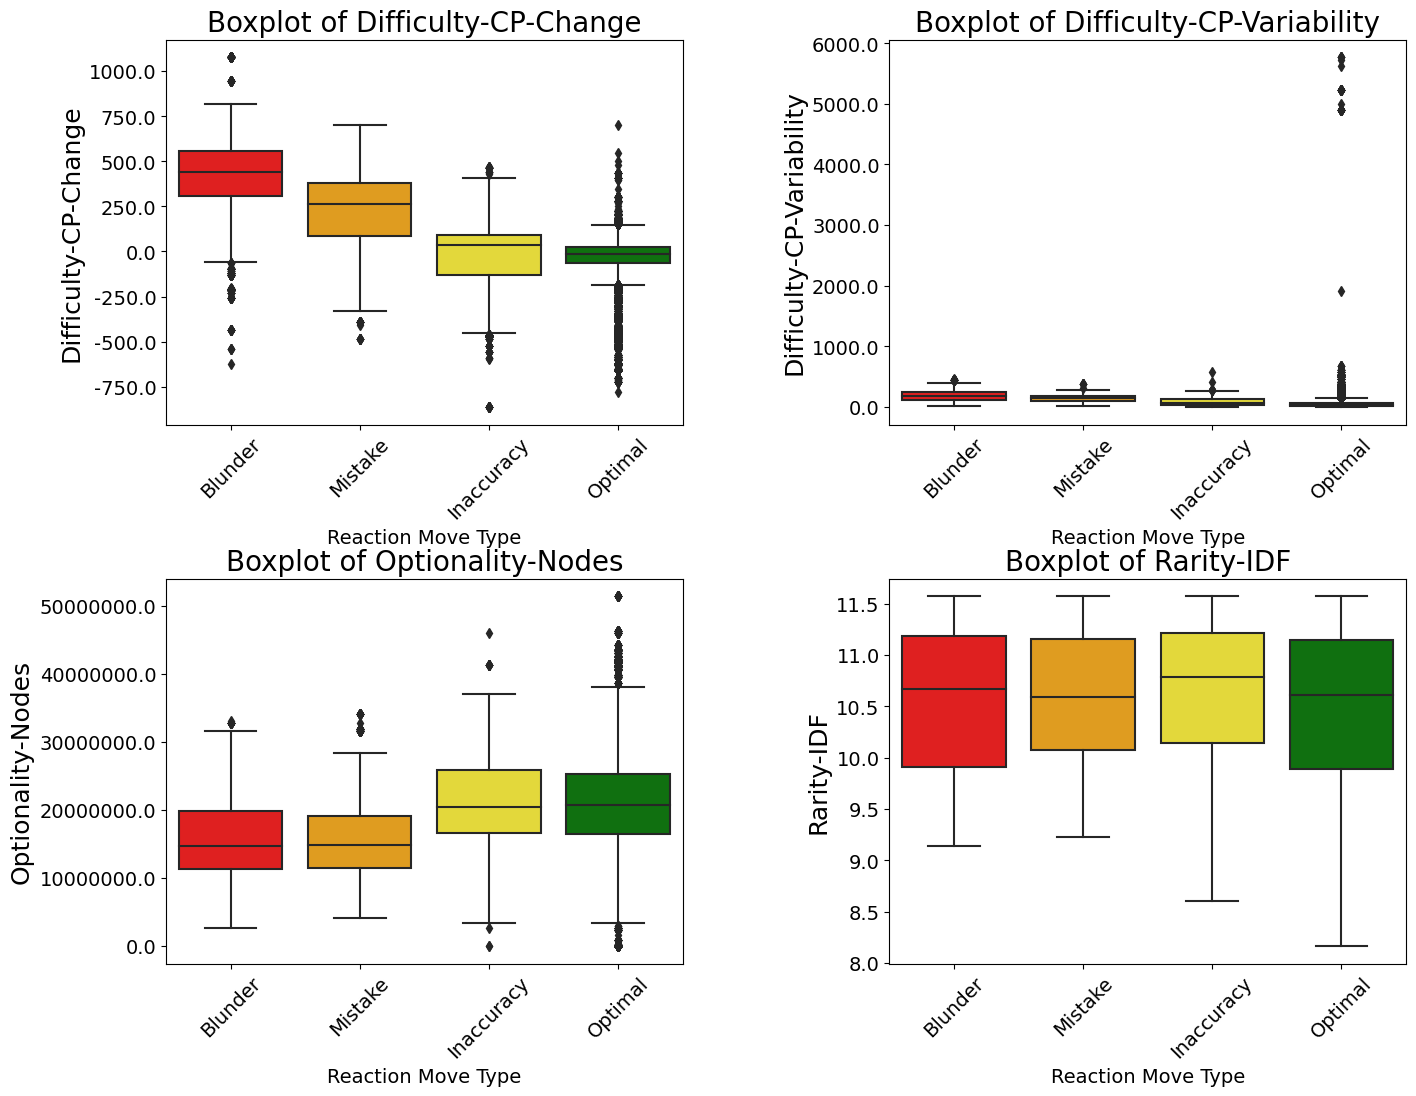

In [2]:
# Renaming columns for better readability
df = df.rename(columns={
    'constellation_cp_change': 'Difficulty-CP-Change',
    'cp_sd_diff': 'Difficulty-CP-Variability',
    'const_11_nodes_searched': 'Optionality-Nodes',
    'idf': 'Rarity-IDF'
})

# Colors for each move type
colors = ['Red', 'Orange', '#FFF01F', 'Green']

# Create boxplots for each variable
variables = ['Difficulty-CP-Change', 'Difficulty-CP-Variability', 'Optionality-Nodes', 'Rarity-IDF']
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for ax, variable in zip(axs.flatten(), variables):
    sns.boxplot(x='reaction_move_type', y=variable, data=df, ax=ax, palette=colors)
    ax.set_title(f'Boxplot of {variable}', fontsize=20)
    ax.set_xlabel('Reaction Move Type', fontsize=14)
    ax.set_ylabel(variable, fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14)
    ax.set_yticklabels(ax.get_yticks(), fontsize=14)

plt.show()